In [1]:
import pandas as pd

In [2]:
it_adj_list = []

for line in open("./it_nonit adjective/mecha_log_it.txt","r",encoding="UTF8"):
    it_adj_list.append(line)

it_adj_string = ""
for line in it_adj_list:
    try:
        it_adj_string = it_adj_string + line[:line.index(",\n")]
        it_adj_string = it_adj_string + "!"
    except:
        it_adj_string = it_adj_string + line
it_adj_list = it_adj_string.split("!")
it_adj_list[0] = it_adj_list[0][1:]
del it_adj_list[-1]
it_adj_list = [adj.strip() for adj in it_adj_list]
it_dict = dict()
for adj in it_adj_list:
    word,num = adj.split(',')
    word = word[2:-1]
    num = num[1:-1]
    it_dict[word]= num

In [3]:
nonit_adj_list = []

for line in open("./it_nonit adjective/revu_non_it.txt","r",encoding="UTF8"):
    nonit_adj_list.append(line)

nonit_adj_string = ""
for line in nonit_adj_list:
    try:
        nonit_adj_string = nonit_adj_string + line[:line.index(",\n")]
        nonit_adj_string = nonit_adj_string + "!"
    except:
        nonit_adj_string = nonit_adj_string + line
nonit_adj_list = nonit_adj_string.split("!")
nonit_adj_list[0] = nonit_adj_list[0][1:]
del nonit_adj_list[-1]
nonit_adj_list = [adj.strip() for adj in nonit_adj_list]
nonit_dict = dict()
for adj in nonit_adj_list:
    word,num = adj.split(',')
    word = word[2:-1]
    num = num[1:-1]
    nonit_dict[word]= num

In [4]:
it_total = sum(list(map(int,it_dict.values())))
nonit_total = sum(list(map(int,nonit_dict.values())))

In [5]:
no_dup_it_adj_dict = dict()
no_dup_nonit_adj_dict = dict()

for k,v in it_dict.items():
    try:
        if int(v)/it_total < int(nonit_dict[k])/nonit_total:
            pass
        else:
            no_dup_it_adj_dict[k] = v
    except:
        pass
for k,v in nonit_dict.items():
    try:
        if int(v)/nonit_total < int(it_dict[k])/it_total:
            pass
        else:
            no_dup_nonit_adj_dict[k] = v
    except:
        pass

In [6]:
no_dup_it_adj_dict

{'있다': '611',
 '이다': '225',
 '같다': '147',
 '연결하다': '120',
 '없다': '99',
 '아니다': '73',
 '가능하다': '45',
 '필요하다': '41',
 '간단하다': '39',
 '다르다': '23',
 '원하다': '22',
 '어떻다': '20',
 '충분하다': '19',
 '자세하다': '15',
 '안되다': '14',
 '비슷하다': '14',
 '저렴하다': '14',
 '빠르다': '14',
 '안녕하다': '14',
 '깔끔하다': '13',
 '정확하다': '12',
 '짧다': '12',
 '비싸다': '10',
 '아쉽다': '10',
 '완전하다': '9',
 '복잡하다': '9',
 '빨갛다': '9',
 '느리다': '8',
 '튼튼하다': '8',
 '야하다': '8',
 '편리하다': '7',
 '중요하다': '7',
 '변하다': '6',
 '단순하다': '6',
 '상관없다': '6',
 '확실하다': '6',
 '유명하다': '5',
 '인하다': '5',
 '유용하다': '5',
 '익숙하다': '5',
 '똑같다': '4',
 '유사하다': '4',
 '특별하다': '4',
 '강하다': '4',
 '알맞다': '4',
 '당연하다': '4',
 '적당하다': '3',
 '불편하다': '3',
 '아담하다': '2',
 '깊다': '2',
 '안좋다': '2',
 '멀다': '2',
 '실패하다': '2',
 '원활하다': '2',
 '빨르다': '2',
 '기대하다': '2'}

In [7]:
def unpack_dict(keywords_dict):
    keywords = []
    keywords_values = []

    for idx,items in enumerate(keywords_dict.items()):
        key, value = items
        if idx >= 14:
            if len(keywords_values) == 15:
                keywords_values[-1] += int(value)
            else:
                keywords_values.append(int(value))
                keywords.append("기타")
        else:
            keywords.append(key)
            keywords_values.append(int(value))    
    return keywords,keywords_values


In [8]:
it_keywords,it_keywords_values = unpack_dict(no_dup_it_adj_dict)
not_it_keywords,not_it_keywords_values = unpack_dict(no_dup_nonit_adj_dict)

In [9]:
from matplotlib import pyplot as plt

In [10]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [11]:
def plot_pie(X,y):
    explode = [1/len(X) for _ in range(len(X))]
    y_sum = sum(y)
    y_ratio = [yy/y_sum for yy in y]
    plt.pie(y_ratio,labels=X,autopct='%.2f%%',explode=explode)
    plt.show()


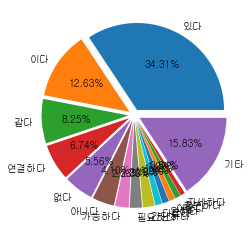

In [12]:
plot_pie(it_keywords,it_keywords_values)

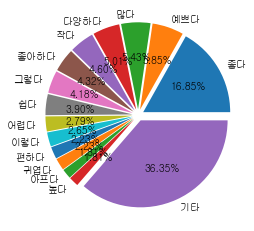

In [13]:
plot_pie(not_it_keywords,not_it_keywords_values)

In [67]:
import googletrans

In [74]:
def translate_list(lst):
    translator = googletrans.Translator()
    translated_lst = []
    for query in lst:
        try:
            translated_lst.append(translator.translate(query,dest='en').text) 
        except:
            pass
    return translated_lst


In [75]:
translated_it_list = translate_list(no_dup_it_adj_dict.keys())

In [76]:
translated_non_it_list = translate_list(no_dup_nonit_adj_dict.keys())

In [78]:
translated_non_it_list

['good',
 'same',
 'many',
 'pretty',
 'Varies',
 'small',
 'how',
 'like',
 'relaxing',
 'difficult',
 'cute',
 'want',
 'Hello',
 'pretty',
 'It is clean',
 'new',
 'easy',
 'safe',
 'Put on',
 'Hard',
 'Warm',
 'easy',
 'wonder',
 'fun',
 'Silver',
 'It is interesting',
 'cool',
 'fun',
 'be there',
 'meticulous',
 'Miraculous',
 "it's a shame",
 'Have',
 'Is proud',
 'sick',
 'Clean',
 'special',
 'wide',
 'Luxurious',
 'thin',
 'hot',
 'Happy',
 'strong',
 'beautiful',
 'honest',
 'heavy',
 'Conquer',
 'Ask',
 'Perfect',
 'strong',
 'Naturalize',
 'It is perfect',
 'paint',
 'Whirl',
 'Snip',
 'busy',
 'Scribe',
 'free',
 'add',
 'thick',
 'Cumbersome',
 'Harden',
 "I'm bored",
 'tremendous',
 'hard',
 'Stiff',
 'White',
 'excited',
 'full in here',
 'Power',
 'nice',
 'deep',
 'Not required',
 'detailed',
 'lovely',
 'Gorgeous',
 'Ever',
 'Make',
 'Stunner',
 'precious',
 'in a hurry',
 'Circle',
 'quiet',
 'Be agram',
 'Be easily',
 'same',
 'great',
 'narrow',
 'dark',
 'Get',


In [79]:
subjective_unigram = ['amazing','beautiful','cheap','decent','effective','fantastic','good','happy','impress','jittery','light','madly','nice','outstanding','perfect','quick','responsive','sharp','terrible','ultimate','wonderful']
objective_unigram = ['access','because','chance','default','entire','few','go','half','inside','job','keep','know','last','matter','new','only','past','quality','read','several','text','use','version','was','young']


In [86]:
it_sub_score = 0
it_obj_score = 0
non_it_sub_score = 0
non_it_obj_score = 0

for word in translated_it_list:
    if word in subjective_unigram:
        print(f" IT_sub : {word}")
        it_sub_score += 1
    if word in objective_unigram:
        print(f" IT_obj : {word}")
        it_obj_score += 1
for word in translated_non_it_list:
    if word in subjective_unigram:
        print(f" NON_IT_sub : {word}")
        non_it_sub_score += 1
    if word in objective_unigram:
        print(f" NON_IT_obj : {word}")
        non_it_obj_score += 1

 IT_sub : light
 IT_sub : outstanding
 NON_IT_sub : good
 NON_IT_obj : new
 NON_IT_sub : beautiful
 NON_IT_sub : nice
 NON_IT_obj : young


In [81]:
it_sub_score

2

In [82]:
it_obj_score

0

In [83]:
non_it_sub_score

3

In [84]:
non_it_obj_score

2